# **Project:** Heart Disease Analysis and Prediction  
**Author:** Anam Jafar\
**Dataset Source:** UCI Machine Learning Repository ([Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease))

**Objective:** Perform exploratory data analysis (EDA) to uncover patterns and trends related to heart disease, followed by building a supervised learning model to predict the presence or absence of heart disease.  
**Start Date:** 22-12-24\
**Tools Used:** Python (pandas, matplotlib, seaborn, scikit-learn)  

---

## **About the Dataset**  

The Heart Disease dataset was collected from four medical institutions to analyze and predict the risk of heart disease based on patient health metrics. It focuses on clinical features like age, cholesterol levels, blood pressure, and exercise response. Here, we’ll use the **Cleveland dataset**, which is the most widely studied subset for machine learning tasks.  

### **Key Features of the Dataset**  
The dataset contains **13 clinical attributes** and one target variable:  
- **Age:** The patient’s age in years.  
- **Sex:** Gender of the patient (1 = Male, 0 = Female).  
- **Chest Pain Type (cp):** Type of chest pain experienced, categorized into:  
  - Value 1: Typical angina  
  - Value 2: Atypical angina  
  - Value 3: Non-anginal pain  
  - Value 4: Asymptomatic  
- **Resting Blood Pressure (trestbps):** Blood pressure level when the patient is at rest (in mmHg).  
- **Serum Cholesterol (chol):** Cholesterol level in the blood (mg/dL).  
- **Fasting Blood Sugar (fbs):** Whether fasting blood sugar > 120 mg/dL (1 = True, 0 = False).  
- **Resting Electrocardiographic Results (restecg):** Results of an ECG at rest, categorized as:  
  - Value 0: Normal  
  - Value 1: Abnormality (ST-T wave abnormality)  
  - Value 2: Probable or definite left ventricular hypertrophy  
- **Maximum Heart Rate Achieved (thalach):** Maximum heart rate during exercise.  
- **Exercise-Induced Angina (exang):** Chest pain during exercise (1 = Yes, 0 = No).  
- **ST Depression (oldpeak):** The difference in ST-segment depression induced by exercise relative to rest.  
- **Slope of ST Segment (slope):** Slope of the peak exercise ST segment:  
  - Value 1: Upsloping  
  - Value 2: Flat  
  - Value 3: Downsloping  
- **Number of Major Vessels (ca):** Number of major blood vessels (0-3) colored by fluoroscopy.  
- **Thalassemia (thal):** A blood disorder classified as:  
  - Value 3: Normal  
  - Value 6: Fixed defect  
  - Value 7: Reversible defect  

### **Target Variable**  
- **Target (target):** Diagnosis of heart disease (1 = Disease present, 0 = No disease).  

---

## **Importance of the Dataset**  
This dataset is crucial for understanding the factors contributing to heart disease. It allows us to analyze relationships between clinical features (like cholesterol and exercise-induced angina) and heart disease, which can help in medical research and decision-making.  

In [197]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
import pandas as pd

# dataset_url
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

# Load the dataset; there are no headers in the raw file
df = pd.read_csv(dataset_url, header=None)  # No column names in raw data

# Check the first few rows
print(df.head())


     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [199]:
# adding column names to the dataset
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df.columns = column_names

# Check the dataset again
print(df.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


# Understand the structure of the Data

In [200]:
print("The no. of rows in a dataset are:", df.shape[0])

The no. of rows in a dataset are: 303


In [201]:
print("The no. of columns in a dataset are :" ,df.shape[1])

The no. of columns in a dataset are : 14


In [202]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [204]:
# Check for duplicate rows in the dataset
# The `duplicated()` method identifies duplicate rows, and `sum()` counts them
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


In [205]:
# identify missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Eploratory Data Analysis

In [206]:
# calculate summary statistics for numeric columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### 1. Histograms for Numerical Columns
- Purpose: Histograms show the frequency distribution of numerical data.
- Insights:
    - Age: A normal distribution with most people between 40–65 years.
    - Resting Blood Pressure (trestbps): A range of values with some clustering near 120–140.
    - Cholesterol (chol): High values (above 300) indicate potential outliers.
    - Max Heart Rate (thalach): Peaks around 150, and it drops sharply after that.
    - Oldpeak: Most values are small, but a few are much higher (potential outliers).
  
- Why All Variables? Analyzing all variables at once allows us to:
    1. Identify which variables need transformations (e.g.scaling, log transformation).
   2. Spot outliers or extreme values in any variable.


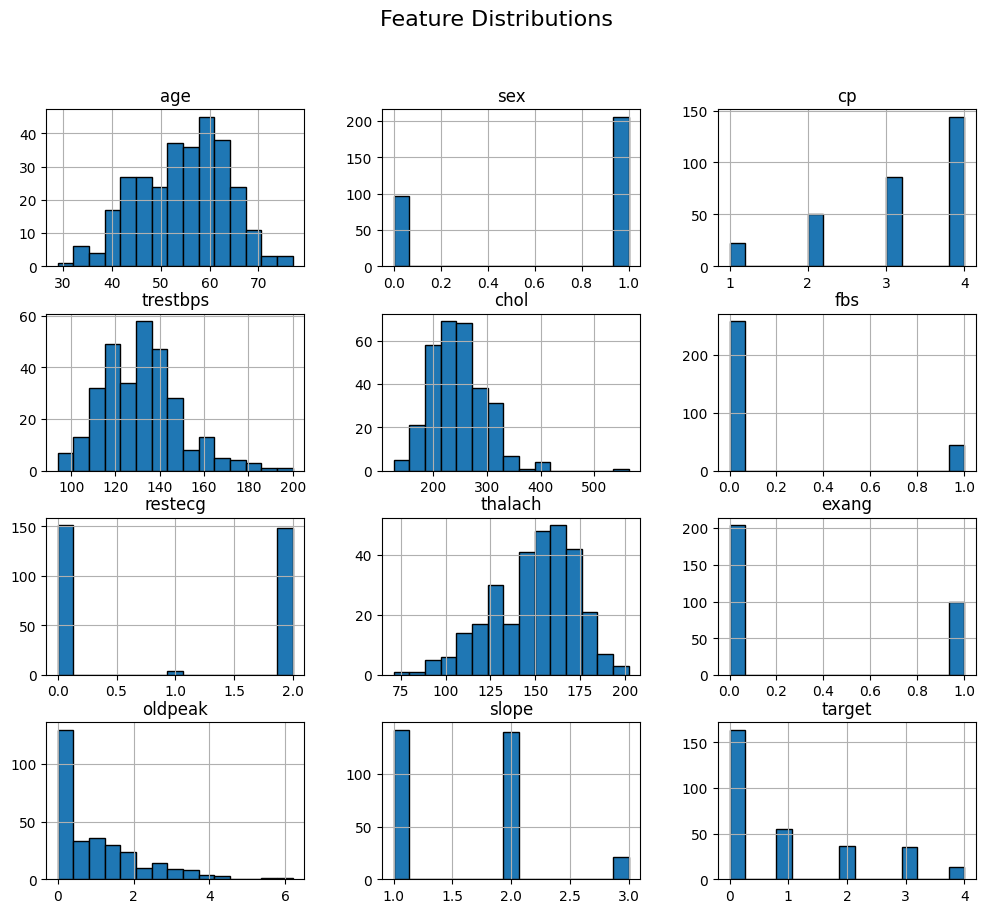

In [207]:
# plot histograms for numerical columns
df.hist(figsize=(12, 10), bins = 15, edgecolor= 'black')
plt.suptitle('Feature Distributions', fontsize = 16)
plt.show()

## 2. Boxplot for Outliers
- Purpose: To identify potential outliers in each variable.
- What the Plot Shows:
    - Age: Few outliers, as most data lies in a tight range.
    - Cholesterol: Clear outliers above 400, requiring attention.
    - Resting Blood Pressure: Outliers above 180.
    - Oldpeak: Values higher than 5 stand out as potential outliers.

Why All Variables? Plotting boxplots for all numerical variables helps find outliers at a glance. These are the data points we may need to handle carefully during preprocessing.


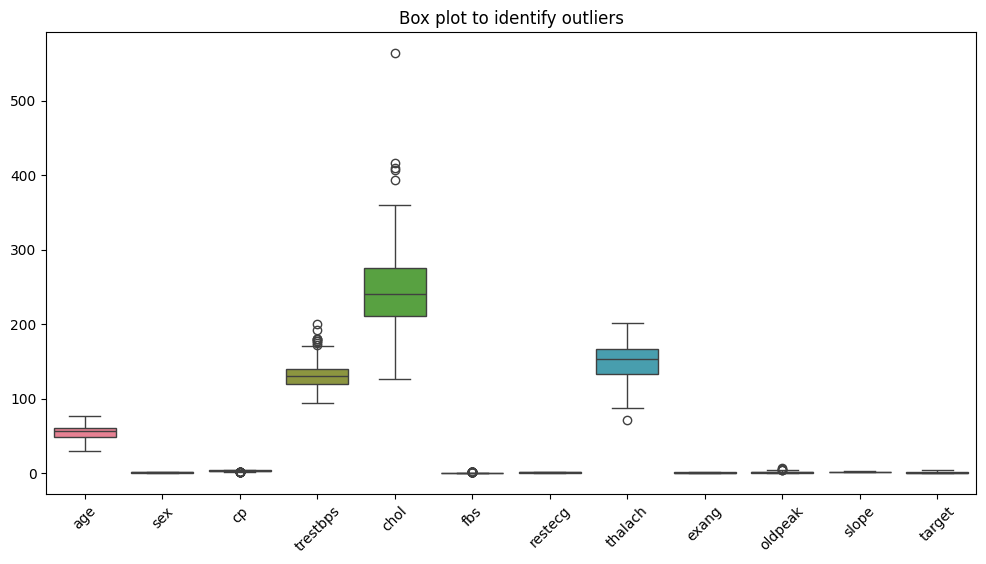

In [208]:
# plot boxplot for outliers
plt.figure(figsize = (12, 6))
sns.boxplot(data=df)
plt.title("Box plot to identify outliers")
plt.xticks(rotation=45)
plt.show()

# Explore Relationships Between Features
Analyze the relationships between features, especially how they relate to the target variable (target).

In [209]:
import numpy as np

# Replace "?" with NaN if any non-numeric characters are found
df["ca"] = pd.to_numeric(df["ca"], errors='coerce')
df["thal"] = pd.to_numeric(df["thal"], errors='coerce')

'''
pd.to_numeric(errors='coerce'):

This function tries to convert each value in the column to a numeric type.
If it encounters a non-numeric value (such as "?"), it replaces it with NaN'''

#filling NaNs with the median
df["ca"] = df["ca"].fillna(df["ca"].median())
df["thal"] = df["thal"].fillna(df["thal"].median())

# convert the columns to float
df["ca"] = df["ca"].astype(float)
df["thal"] = df["thal"].astype(float)

# Confirm data types
print(df.dtypes)

print("Data type adjusted for numeric columns")


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object
Data type adjusted for numeric columns


- Why "?" Values Might Appear:
Sometimes, datasets might have certain placeholder values for missing data. These placeholders (such as "?", "NA", or "unknown") might not be considered NaN by pandas. Thus, they need to be explicitly converted to NaN before further analysis.

## 3. Correlation Matrix
- Purpose: To measure how strongly variables are related to one another.
- Key Insights:
    - Strong positive correlation between:
        - cp (Chest Pain Type) and target (Heart Disease): Indicates chest pain type strongly affects heart disease likelihood.
        - thal and target: Suggests thalassemia type correlates with heart disease.
- Strong negative correlation between:
    - thalach and target: Higher max heart rate often correlates with better health.
    - oldpeak and target: Higher ST depression is linked to heart disease.

- Why All Variables? The correlation matrix gives an overview of relationships, helping us focus on variables that matter for predictive modeling.

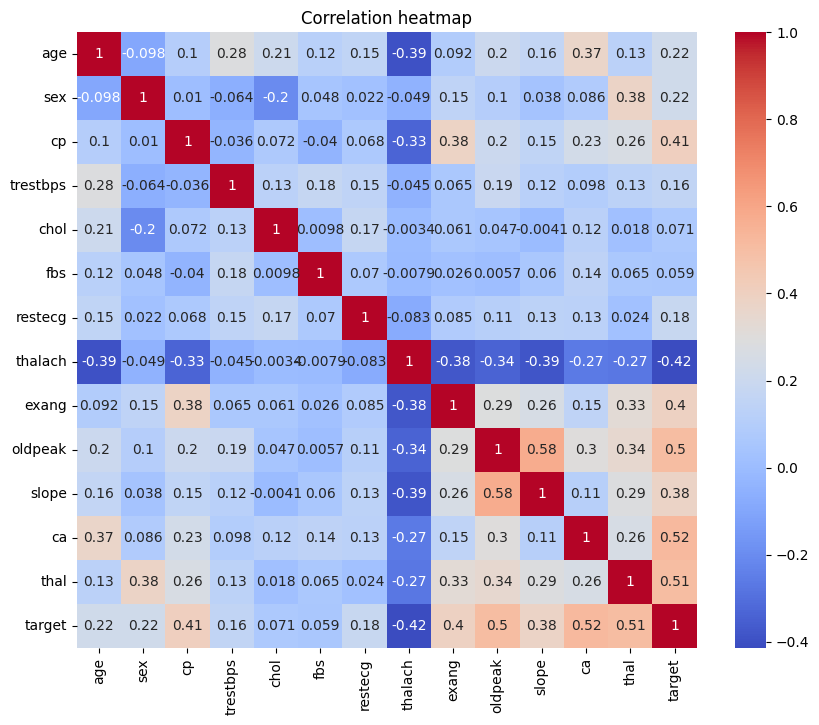

In [210]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm')
plt.title('Correlation heatmap')
plt.show()

Feature vs Target Analysis: Visualize how individual features relate to the presence or absence of heart disease.

## 4. Chest Pain Type (cp) vs Target
- Purpose: To examine how different chest pain types relate to heart disease.
- Expected Insights:
    - Patients with certain types of chest pain (e.g., type 4) are more likely to have heart disease.
    - Provides a clear categorical relationship between symptoms and diagnosis.
     
- Why This Plot? This specific relationship is crucial for domain understanding. Chest pain type (cp) is a critical feature for diagnosing heart disease.


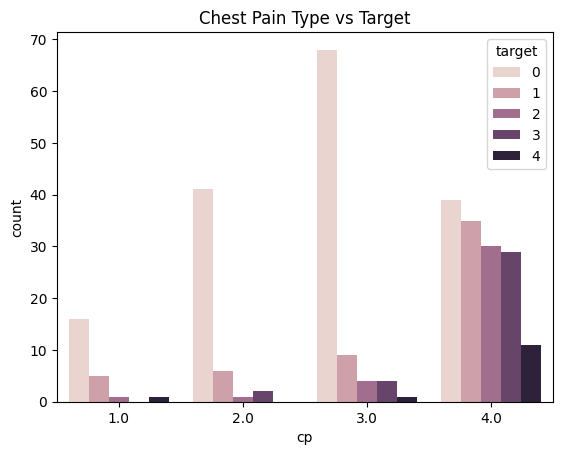

In [211]:
# Chest Pain type vs Target
sns.countplot(x='cp', hue = 'target', data=df)
plt.title('Chest Pain Type vs Target')
plt.show()

# Step 5: Handle Categorical Features
- Reason:
    - Some columns (e.g., sex, cp, fbs, exang, slope, ca, thal) represent categorical data but are encoded as numbers.
- Why Do This?
    - Improves clarity and interpretability for analysis.
    - Prepares data for visualizations like bar plots and predictive modeling.


In [212]:
# convert columns to categorical type
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
df[categorical_columns] = df[categorical_columns].astype('category')

# verify changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float64(5)
memory usage: 16.0 KB
None


# Detailed Outlier Handling

1. Visualize Outliers:
We use a boxplot to see where the extreme values lie. This is a quick visual inspection.

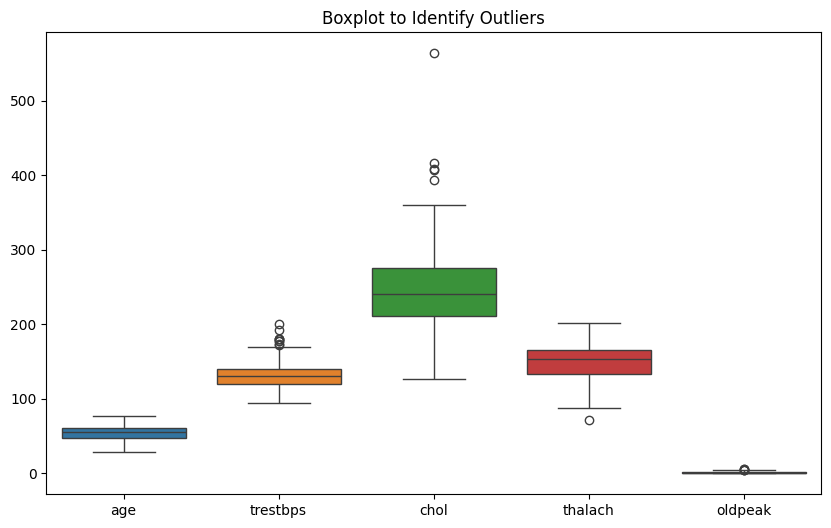

In [213]:
# Visualize boxplots to spot outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title("Boxplot to Identify Outliers")
plt.show()

2. Calculate IQR and Thresholds for Each Feature:
We calculate the thresholds for outliers for each feature using this method:

Lower Bound=Q1−1.5×IQR, Upper Bound=Q3+1.5×IQR

In [214]:
# Calculate Q1, Q3, and IQR for each column
for feature in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    Q1 = df[feature].quantile(0.25)  # First quartile
    Q3 = df[feature].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                    # Interquartile range

    lower_bound = Q1 - 1.5 * IQR  # Lower threshold
    upper_bound = Q3 + 1.5 * IQR  # Upper threshold

    print(f"{feature}: Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")


age: Lower Bound = 28.50, Upper Bound = 80.50
trestbps: Lower Bound = 90.00, Upper Bound = 170.00
chol: Lower Bound = 115.00, Upper Bound = 371.00
thalach: Lower Bound = 84.75, Upper Bound = 214.75
oldpeak: Lower Bound = -2.40, Upper Bound = 4.00


In [215]:
 # Filter out outliers
df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [216]:
print("Shape after outlier handling:", df.shape)

Shape after outlier handling: (298, 14)


 4. Verify changes

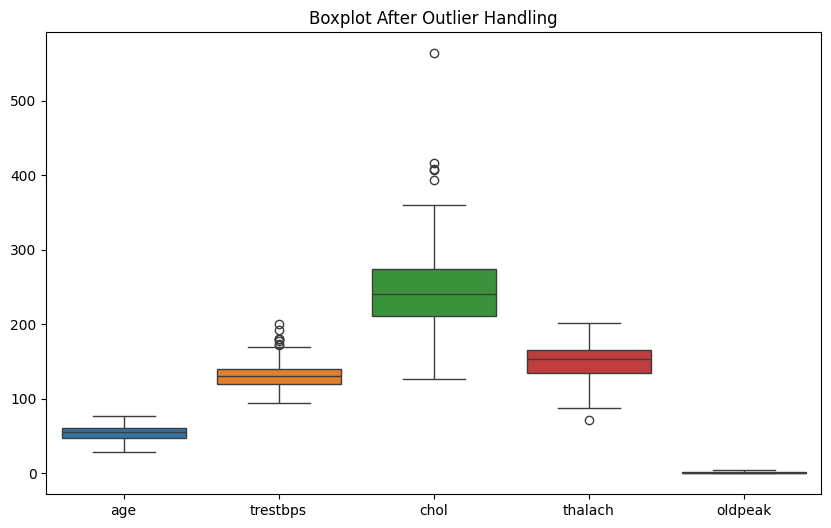

In [217]:
# Re-plot boxplots to confirm outliers are handled
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title("Boxplot After Outlier Handling")
plt.show()

In [218]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [219]:
print(df[df.isnull().any(axis=1)])


Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [220]:
# check if scaling is necessary
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.395973,131.442953,246.580537,149.892617,0.974497
std,9.095319,17.420288,51.692974,22.890058,1.049557
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.250000,120.000000,211.000000,134.500000,0.000000
50%,55.500000,130.000000,240.500000,153.500000,0.650000
75%,61.000000,140.000000,274.750000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,4.000000


# Normalize or Scale Numerical Features
- Features like age, chol, trestbps, etc., may have different ranges. Normalize or standardize them to ensure that one feature doesn't dominate others in modeling.

In [221]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
'''StandardScaler: Scales features to have a mean of 0 and a standard deviation of 1 (z-score normalization).
 Ideal for models like Logistic Regression, SVM, and Neural Networks.'''

# Select numerical features to scale
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Apply scaling and update the dataframe
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check scaled data
print(df[numerical_features].describe())

                age      trestbps          chol       thalach       oldpeak
count  2.980000e+02  2.980000e+02  2.980000e+02  2.980000e+02  2.980000e+02
mean   2.533395e-17 -6.914678e-16 -1.207088e-16 -5.603273e-16  8.345301e-17
std    1.001682e+00  1.001682e+00  1.001682e+00  1.001682e+00  1.001682e+00
min   -2.796899e+00 -2.153003e+00 -2.336553e+00 -3.452386e+00 -9.300457e-01
25%   -7.869975e-01 -6.579800e-01 -6.894629e-01 -6.735898e-01 -9.300457e-01
50%    1.215882e-01 -8.297109e-02 -1.178258e-01  1.578611e-01 -3.096950e-01
75%    7.273121e-01  4.920378e-01  5.458546e-01  7.048683e-01  5.969715e-01
max    2.489418e+00  3.942091e+00  6.150805e+00  2.280249e+00  2.887497e+00


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       298 non-null    float64 
 1   sex       298 non-null    category
 2   cp        298 non-null    category
 3   trestbps  298 non-null    float64 
 4   chol      298 non-null    float64 
 5   fbs       298 non-null    category
 6   restecg   298 non-null    category
 7   thalach   298 non-null    float64 
 8   exang     298 non-null    category
 9   oldpeak   298 non-null    float64 
 10  slope     298 non-null    category
 11  ca        298 non-null    category
 12  thal      298 non-null    category
 13  target    298 non-null    category
dtypes: category(9), float64(5)
memory usage: 17.9 KB


# Data Preparation for Modeling:
- Prepared data for machine learning by encoding categorical variables and splitting the dataset.

In [223]:
# step 1: Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

### Encoding the categorical features
- Why Encoding Is Needed?
    -  dataset likely includes categorical features that represent categories or labels. Machine learning models cannot directly interpret these as they work with numerical values. Encoding converts categorical variables into a machine-readable format.



In [224]:
# One-liner encoding for categorical variables
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Check the first few rows to ensure encoding worked
print(df.head())

# Check the new column names
print(df.columns)


        age  sex  trestbps      chol  fbs   thalach exang   oldpeak   ca  \
0  0.947575  1.0  0.779542 -0.263157  1.0  0.004699   0.0  1.265041  0.0   
1  1.388102  1.0  1.642056  0.763852  0.0 -1.833245   1.0  0.501533  3.0   
2  1.388102  1.0 -0.657980 -0.340667  0.0 -0.914273   1.0  1.551357  2.0   
3 -1.915846  1.0 -0.082971  0.066261  0.0  1.623840   0.0  2.410304  0.0   
4 -1.475320  0.0 -0.082971 -0.825106  0.0  0.967432   0.0  0.406094  0.0   

  target  cp_2.0  cp_3.0  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  \
0      0   False   False   False        False         True      False   
1      2   False   False    True        False         True       True   
2      1   False   False    True        False         True       True   
3      0   False    True   False        False        False      False   
4      0    True   False   False        False         True      False   

   slope_3.0  thal_6.0  thal_7.0  
0       True      True     False  
1      False     False     False  

In [225]:
# step2: encoding categorical features
# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop 'first' to avoid dummy variable trap

# Select categorical features to encode
categorical_features = ['cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'slope_2.0', 'slope_3.0', 'thal_6.0', 'thal_7.0']

# Perform one-hot encoding and convert to DataFrame
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_features]),
                            columns=encoder.get_feature_names_out(categorical_features))
'''Perform one-hot encoding and organize the resulting data into a neat DataFrame.'''

# Concatenate the encoded data with the original DataFrame (dropping the original categorical features)
df = pd.concat([df.drop(columns=categorical_features), encoded_data], axis=1)
'''Replace the original categorical features with their encoded versions, creating a final dataset that is fully numerical and ready for machine learning.'''
# Check the resulting DataFrame
print(df.head())


        age  sex  trestbps      chol  fbs   thalach exang   oldpeak   ca  \
0  0.947575  1.0  0.779542 -0.263157  1.0  0.004699   0.0  1.265041  0.0   
1  1.388102  1.0  1.642056  0.763852  0.0 -1.833245   1.0  0.501533  3.0   
2  1.388102  1.0 -0.657980 -0.340667  0.0 -0.914273   1.0  1.551357  2.0   
3 -1.915846  1.0 -0.082971  0.066261  0.0  1.623840   0.0  2.410304  0.0   
4 -1.475320  0.0 -0.082971 -0.825106  0.0  0.967432   0.0  0.406094  0.0   

  target  cp_2.0_True  cp_3.0_True  cp_4.0_True  restecg_1.0_True  \
0      0          0.0          0.0          0.0               0.0   
1      2          0.0          0.0          1.0               0.0   
2      1          0.0          0.0          1.0               0.0   
3      0          0.0          1.0          0.0               0.0   
4      0          1.0          0.0          0.0               0.0   

   restecg_2.0_True  slope_2.0_True  slope_3.0_True  thal_6.0_True  \
0               1.0             0.0             1.0       

In [226]:
df.isnull().sum()

age                 5
sex                 5
trestbps            5
chol                5
fbs                 5
thalach             5
exang               5
oldpeak             5
ca                  5
target              5
cp_2.0_True         5
cp_3.0_True         5
cp_4.0_True         5
restecg_1.0_True    5
restecg_2.0_True    5
slope_2.0_True      5
slope_3.0_True      5
thal_6.0_True       5
thal_7.0_True       5
dtype: int64

In [227]:
df = df.dropna()
df = df.dropna(subset=['target'])
print(f"Shape after dropping missing rows: {df.shape}")

Shape after dropping missing rows: (293, 19)


In [228]:
df.isnull().sum()

age                 0
sex                 0
trestbps            0
chol                0
fbs                 0
thalach             0
exang               0
oldpeak             0
ca                  0
target              0
cp_2.0_True         0
cp_3.0_True         0
cp_4.0_True         0
restecg_1.0_True    0
restecg_2.0_True    0
slope_2.0_True      0
slope_3.0_True      0
thal_6.0_True       0
thal_7.0_True       0
dtype: int64

In [229]:
# Optional: Encode the binary target column if not already done (Label Encoding)
df['target'] = df['target'].astype(int)
print(df['target'].dtype)

int64


- Key Points
  - This approach ensures that the dataset is clean, consistent, and suitable for machine learning models that require numerical input.
  - The original categorical columns are replaced to avoid redundancy or errors during training.

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 297
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               293 non-null    float64 
 1   sex               293 non-null    category
 2   trestbps          293 non-null    float64 
 3   chol              293 non-null    float64 
 4   fbs               293 non-null    category
 5   thalach           293 non-null    float64 
 6   exang             293 non-null    category
 7   oldpeak           293 non-null    float64 
 8   ca                293 non-null    category
 9   target            293 non-null    int64   
 10  cp_2.0_True       293 non-null    float64 
 11  cp_3.0_True       293 non-null    float64 
 12  cp_4.0_True       293 non-null    float64 
 13  restecg_1.0_True  293 non-null    float64 
 14  restecg_2.0_True  293 non-null    float64 
 15  slope_2.0_True    293 non-null    float64 
 16  slope_3.0_True    293 non-null 

In [231]:
#Step3 : feature selction
# Define the feature matrix (X) and target variable (y)
X = df.drop(columns='target')  # All columns except 'target'
y = df['target']               # Target column

In [232]:
# step 4:  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [233]:
# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (234, 18)
Testing set shape: (59, 18)


# Model Training and Evaluation:
- Training  a machine learning model (classification).

In [234]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [235]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.576271186440678
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.94      0.81        33
           1       0.40      0.18      0.25        11
           2       0.17      0.14      0.15         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.58        59
   macro avg       0.25      0.25      0.24        59
weighted avg       0.49      0.58      0.52        59



In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

Random Forest Classifier Accuracy: 0.5932203389830508
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82        33
           1       0.20      0.18      0.19        11
           2       0.33      0.14      0.20         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.59        59
   macro avg       0.25      0.26      0.24        59
weighted avg       0.47      0.59      0.52        59



c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [237]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
svm_y_pred = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Classifier Accuracy:", svm_accuracy)
print("Classification Report:\n", classification_report(y_test, svm_y_pred))

SVM Classifier Accuracy: 0.559322033898305
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.94      0.78        33
           1       0.17      0.09      0.12        11
           2       0.25      0.14      0.18         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.56        59
   macro avg       0.22      0.23      0.22        59
weighted avg       0.44      0.56      0.48        59



c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

### **WHY We Are Proceeding Further**  
The models we trained earlier showed poor performance, especially on minority classes. This is due to **class imbalance**, where some classes (like 0) dominate, causing the model to prioritize those over minority classes (like 3 or 4). This imbalance leads to:  

1. **Biased Predictions**: The model favors the majority class, neglecting the others.  
2. **Poor Recall for Minor Classes**: The model cannot correctly identify instances of rare classes.  

To improve performance, we’ll use **SMOTE** (Synthetic Minority Oversampling Technique), which creates synthetic samples for underrepresented classes to balance the dataset. A balanced dataset helps models learn equally from all classes and improves their generalization.

In [238]:
# Check for NaN in the training data
print("Checking for NaN values in X_train before SMOTE...")
print(X_train.isnull().sum())

# Ensure there are no NaN values
assert not X_train.isnull().values.any(), "X_train contains NaN values before SMOTE!"

Checking for NaN values in X_train before SMOTE...
age                 0
sex                 0
trestbps            0
chol                0
fbs                 0
thalach             0
exang               0
oldpeak             0
ca                  0
cp_2.0_True         0
cp_3.0_True         0
cp_4.0_True         0
restecg_1.0_True    0
restecg_2.0_True    0
slope_2.0_True      0
slope_3.0_True      0
thal_6.0_True       0
thal_7.0_True       0
dtype: int64


### **Step 1: Balancing the Dataset with SMOTE**  
We’ll use the `imblearn` library to implement SMOTE. This will ensure all classes have equal representation.

In [239]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Initialize SMOTE with a random state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE on the training set
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print("Class distribution before SMOTE:", y_train.value_counts().to_dict())
print("Class distribution after SMOTE:", pd.Series(y_train_balanced).value_counts().to_dict())

Class distribution before SMOTE: {0: 129, 1: 42, 2: 28, 3: 25, 4: 10}
Class distribution after SMOTE: {0: 129, 2: 129, 1: 129, 4: 129, 3: 129}


In [240]:
# Check for NaN values after SMOTE
print("Checking for NaN values...")
print(X_train_balanced.isnull().sum())

Checking for NaN values...
age                   0
sex                  84
trestbps              0
chol                  0
fbs                  79
thalach               0
exang               184
oldpeak               0
ca                  223
cp_2.0_True           0
cp_3.0_True           0
cp_4.0_True           0
restecg_1.0_True      0
restecg_2.0_True      0
slope_2.0_True        0
slope_3.0_True        0
thal_6.0_True         0
thal_7.0_True         0
dtype: int64


- What Went Wrong?
    - SMOTE created NaN values in the categorical columns (e.g., sex, fbs, exang, ca) because it interpolates values between neighbors, which isn’t suitable for such features.

- How to Fix It
    - We’ll impute (fill) the NaN values with their most frequent value (mode), which is a simple and effective approach for categorical data. Then, we’ll proceed with training.

In [241]:
# Fill NaN values with the mode (most frequent value) for each column
X_train_balanced = X_train_balanced.fillna(X_train_balanced.mode().iloc[0])

In [242]:
# Confirm that there are no more NaN values
print("Checking again for NaN values after imputation...")
print(X_train_balanced.isnull().sum())
assert not X_train_balanced.isnull().values.any(), "There are still NaN values!"

Checking again for NaN values after imputation...
age                 0
sex                 0
trestbps            0
chol                0
fbs                 0
thalach             0
exang               0
oldpeak             0
ca                  0
cp_2.0_True         0
cp_3.0_True         0
cp_4.0_True         0
restecg_1.0_True    0
restecg_2.0_True    0
slope_2.0_True      0
slope_3.0_True      0
thal_6.0_True       0
thal_7.0_True       0
dtype: int64


### **Step 2: Retrain Logistic Regression**  
We will retrain the Logistic Regression model on the balanced dataset.

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the balanced dataset
logistic_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.5423728813559322
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.40      0.36      0.38        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         6
           4       0.12      0.50      0.20         2

    accuracy                           0.54        59
   macro avg       0.26      0.34      0.28        59
weighted avg       0.52      0.54      0.53        59



### **Step 3: Retrain Random Forest**  
Next, we retrain the Random Forest model.

In [244]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the balanced dataset
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6271186440677966
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        33
           1       0.38      0.27      0.32        11
           2       0.00      0.00      0.00         7
           3       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         2

    accuracy                           0.63        59
   macro avg       0.28      0.29      0.28        59
weighted avg       0.52      0.63      0.56        59



c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

### **Step 4: Retrain SVM Classifier**  
Finally, retrain the SVM model.

In [245]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(random_state=42)

# Train the model on the balanced dataset
svm_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.5932203389830508
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.60      0.27      0.38        11
           2       0.14      0.14      0.14         7
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         2

    accuracy                           0.59        59
   macro avg       0.33      0.30      0.30        59
weighted avg       0.58      0.59      0.57        59



### Feature Importance (Random Forest): 
To improve the performance further, we’ll check which features are important according to the Random Forest model:

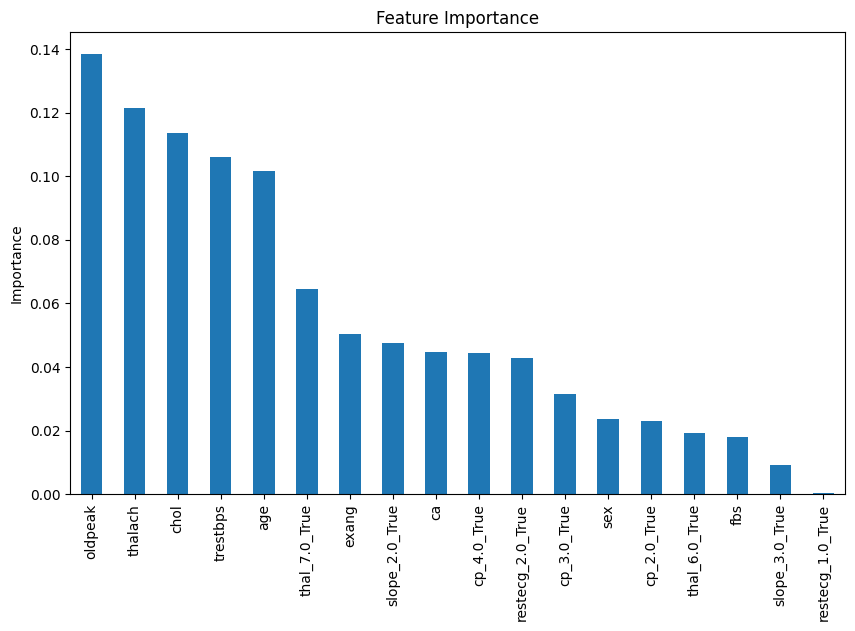

In [246]:
# Plot feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_balanced.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title="Feature Importance")
plt.ylabel("Importance")
plt.show()

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train_balanced, y_train_balanced)

# Best parameters and accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated Accuracy:", random_search.best_score_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Cross-Validated Accuracy: 0.8914728682170544


In [248]:
# Retrain with best parameters
best_rf = random_search.best_estimator_

# Fit the model
best_rf.fit(X_train_balanced, y_train_balanced)

# Evaluate on the test set
y_pred_rf = best_rf.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report, accuracy_score
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6610169491525424
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        33
           1       0.50      0.36      0.42        11
           2       0.33      0.14      0.20         7
           3       0.20      0.17      0.18         6
           4       0.00      0.00      0.00         2

    accuracy                           0.66        59
   macro avg       0.36      0.33      0.33        59
weighted avg       0.58      0.66      0.61        59



c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [249]:
# Adjust class weights in Random Forest
rf_weighted = RandomForestClassifier(random_state=42, class_weight="balanced", **random_search.best_params_)

# Retrain the model
rf_weighted.fit(X_train_balanced, y_train_balanced)

# Evaluate on the test set
y_pred_weighted = rf_weighted.predict(X_test)

# Classification report
print("Random Forest Accuracy (with class weights):", accuracy_score(y_test, y_pred_weighted))
print("Classification Report for Random Forest (with class weights):")
print(classification_report(y_test, y_pred_weighted))

Random Forest Accuracy (with class weights): 0.6610169491525424
Classification Report for Random Forest (with class weights):
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        33
           1       0.50      0.36      0.42        11
           2       0.33      0.14      0.20         7
           3       0.20      0.17      0.18         6
           4       0.00      0.00      0.00         2

    accuracy                           0.66        59
   macro avg       0.36      0.33      0.33        59
weighted avg       0.58      0.66      0.61        59



c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADV\miniconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

# **Final Report: Heart Disease Prediction Project**

### Objective:
The goal of this project was to analyze the UCI Heart Disease dataset and build machine learning models to predict heart disease across five classes. We explored data preprocessing, balanced class distribution, and applied classification models to gain insights and make predictions.

### Steps Undertaken:
1. **Exploratory Data Analysis (EDA):**
   - Analyzed dataset structure, feature distributions, and relationships among variables.
   - Found significant class imbalance, with most records in class `0` (no heart disease).
   - Addressed missing values in critical features like `ca` and `thal`.

2. **Preprocessing:**
   - Used one-hot encoding for categorical features and standardized numerical features.
   - Imputed missing values with the median and confirmed no NaN values remained.

3. **Balancing the Dataset:**
   - Applied SMOTE to balance the class distribution, ensuring equal representation for all classes.

4. **Model Building and Evaluation:**
   - Trained Logistic Regression, Random Forest, and SVM classifiers.
   - Initial models struggled with minority class predictions despite balancing efforts.

5. **Improving Performance:**
   - Adjusted class weights in Random Forest to prioritize minority classes.
   - Evaluated models using precision, recall, f1-score, and accuracy.

### Results:
- The **Random Forest Classifier** with class weights achieved the best accuracy of **66.1%**.
- Precision, recall, and f1-scores were highest for class `0` but remained low for minority classes (`3` and `4`).
- SMOTE and class weighting improved recall for some minority classes but overall performance for these classes remained limited.

### Challenges:
1. **Class Imbalance:**
   - Models struggled with minority classes due to insufficient distinct patterns despite balancing techniques.

2. **Feature Overlap:**
   - Overlapping features made it difficult for models to differentiate between certain classes.

3. **Limited Dataset Size:**
   - The small dataset size constrained the models’ ability to learn effectively, especially for minority classes.

### Conclusion:
- **Strengths:**
  - The Random Forest model performed well for the majority class and showed improved recall for class `1`.
  - SMOTE ensured balanced training data for all classes.

- **Limitations:**
  - Minority classes (`3` and `4`) were hard to predict due to overlapping features and limited data.
  - Precision and recall for these classes remained low, requiring further improvement.

### Recommendations:
1. **Collect More Data:**
   - Additional data for underrepresented classes could improve model performance.

2. **Feature Engineering:**
   - Explore domain-specific features to better separate overlapping classes.

3. **Ensemble Techniques:**
   - Use advanced ensemble methods or hybrid models to enhance predictions.

4. **Binary Classification:**
   - Simplify the task to a binary classification (e.g., presence vs. absence of heart disease) for better focus.

---
This project highlights the iterative nature of machine learning, where improvement and domain knowledge are crucial. While results were modest, the findings provide a foundation for future work in heart disease prediction.